# Reading the Rockstar Database

How to read h5 files: https://atztogo.github.io/phono3py/hdf5_howto.html

The Rockstar h5 files in AbacusCosmos tutorial for python 2.x: nbody.rc.fas.harvard.edu/public/emulator_out/Rockstar_readme.ipynb

http://nbviewer.jupyter.org/url/nbody.rc.fas.harvard.edu/public/emulator_out/Rockstar_readme.ipynb

glob function for python 3.7: https://docs.python.org/3.7/library/glob.html

In [1]:
%pylab inline

import h5py
import glob

base_dir = "/home/filipo/master_thesis/data/AbacusCosmos_720box_planck_z0.100_RockStar/"

Populating the interactive namespace from numpy and matplotlib


/home/filipo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
files = [h5py.File(fn) for fn in glob.glob(base_dir+'/halos_0.*.h5')]

len(files)  # Actually 16, but I only had a few files on hand

32

In [3]:
f = h5py.File(base_dir+'/halos_0.0.h5')


In [4]:
f

<HDF5 file "halos_0.0.h5" (mode r+)>

In [5]:
f.keys

<bound method MappingHDF5.keys of <HDF5 file "halos_0.0.h5" (mode r+)>>

In [6]:
print ( f.keys() )

KeysView(<HDF5 file "halos_0.0.h5" (mode r+)>)


In [7]:
list(f)

['halos']

In [8]:
h = f['halos']

In [9]:
h.shape

(275118,)

Rockstar has it own headers in the h5 file:

In [10]:
h.dtype

dtype([('id', '<i8'), ('parent_id', '<i8'), ('pos', '<f4', (3,)), ('vel', '<f4', (3,)), ('corevel', '<f4', (3,)), ('bulkvel', '<f4', (3,)), ('m', '<f4'), ('m_SO', '<f4'), ('r', '<f4'), ('child_r', '<f4'), ('vmax_r', '<f4'), ('mgrav', '<f4'), ('vmax', '<f4'), ('rvmax', '<f4'), ('rs', '<f4'), ('klypin_rs', '<f4'), ('vrms', '<f4'), ('J', '<f4', (3,)), ('energy', '<f4'), ('spin', '<f4'), ('alt_m', '<f4', (4,)), ('alt_m_SO', '<f4', (4,)), ('Xoff', '<f4'), ('Voff', '<f4'), ('b_to_a', '<f4'), ('c_to_a', '<f4'), ('A', '<f4', (3,)), ('b_to_a2', '<f4'), ('c_to_a2', '<f4'), ('A2', '<f4', (3,)), ('bullock_spin', '<f4'), ('kin_to_pot', '<f4'), ('m_pe_b', '<f4'), ('m_pe_d', '<f4'), ('halfmass_radius', '<f4'), ('num_p', '<i8'), ('num_child_particles', '<i8'), ('p_start', '<i8'), ('desc', '<i8'), ('flags', '<i8'), ('n_core', '<i8'), ('subsamp_start', '<i8'), ('subsamp_len', '<i8'), ('min_pos_err', '<f4'), ('min_vel_err', '<f4'), ('min_bulkvel_err', '<f4'), ('N', '<i4'), ('alt_N', '<i4', (4,)), ('N_SO'

In [11]:
print( h['pos'])

[[2.29330902e+02 1.31931732e+02 7.67158461e+00]
 [2.29892670e+02 1.33057358e+02 6.72841549e+00]
 [2.30509842e+02 1.31941940e+02 8.07964993e+00]
 ...
 [8.66312122e+00 1.64980988e+02 2.66901497e-02]
 [2.63288177e+02 1.26427170e+02 2.33428343e-03]
 [2.61393616e+02 2.49094143e+01 1.07335036e-04]]


In [13]:
x = h['pos'][:,0]
y = h['pos'][:,1]
z = h['pos'][:,2]

## A first slice!

Using the catalog  halos.0.0.h5

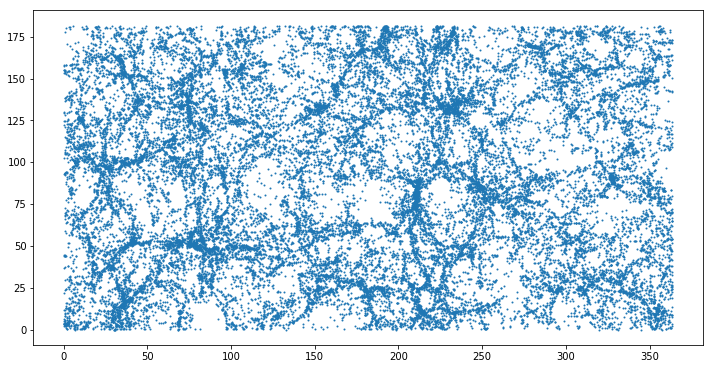

In [38]:
z_max = 20

fig, ax = plt.subplots(1,1)
figsize(12,12)

ax.scatter(x[where(z[:]<z_max)],y[where(z[:]<z_max)], s=1)
ax.set_aspect("equal")

In [15]:
x[where(z[:]<3)].shape

(5392,)

In [16]:
g = h5py.File(base_dir+'/halos_0.1.h5')
i = g['halos']

In [18]:
x1 = i['pos'][:,0]
y1 = i['pos'][:,1]
z1 = i['pos'][:,2]

In [19]:
z1

array([335.83768, 333.79172, 333.0878 , ..., 338.95233, 339.72498,
       207.0109 ], dtype=float32)

## A second bigger slice

Using the catalogs halos.0.0.h5 and halos.0.1.h5

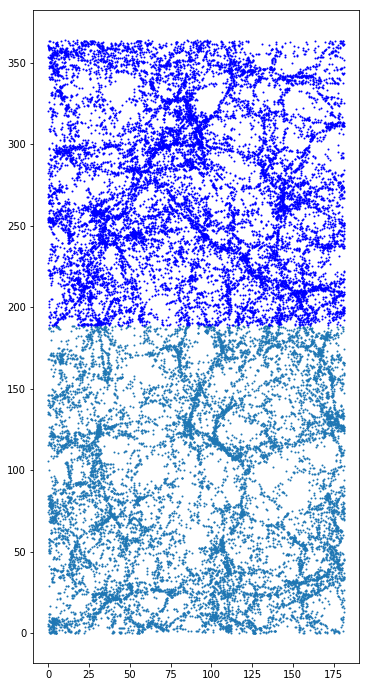

In [49]:
x_max = 20

fig, ax = plt.subplots(1,1)
figsize(12,12)

ax.scatter( y[where(x[:]<x_max)],  z[where(x[:]<x_max)], s=1)
ax.scatter( y1[where(x1[:]<x_max)], z1[where(x1[:]<x_max)], s=1, c="blue")

ax.set_aspect("equal")

